<a href="https://colab.research.google.com/github/RokelisK123/gilusis/blob/main/cnn1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQk4anYFFsY3OTqb6RP4oTBhqPM0P1u80tSRA&usqp=CAU" width=75 height=50>

*Algirdas Laukaitis*

<br><br>

---



# PART 1

<font color='SeaGreen'>Download and prepare the CIFAR10 dataset</font>        <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/80/PICOL_Download.svg/1024px-PICOL_Download.svg.png" width=100 height=100>


In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']




29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Normalizing the pixel values
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Reshape the data for CNN input
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Check the shape of the data
print("Training data shape:", train_images.shape, train_labels.shape)
print("Test data shape:", test_images.shape, test_labels.shape)

Training data shape: (60000, 28, 28, 1) (60000,)
Test data shape: (10000, 28, 28, 1) (10000,)


<br><br>

---
###<font color='SeaGreen'>Let's plot the first 100 images </font>


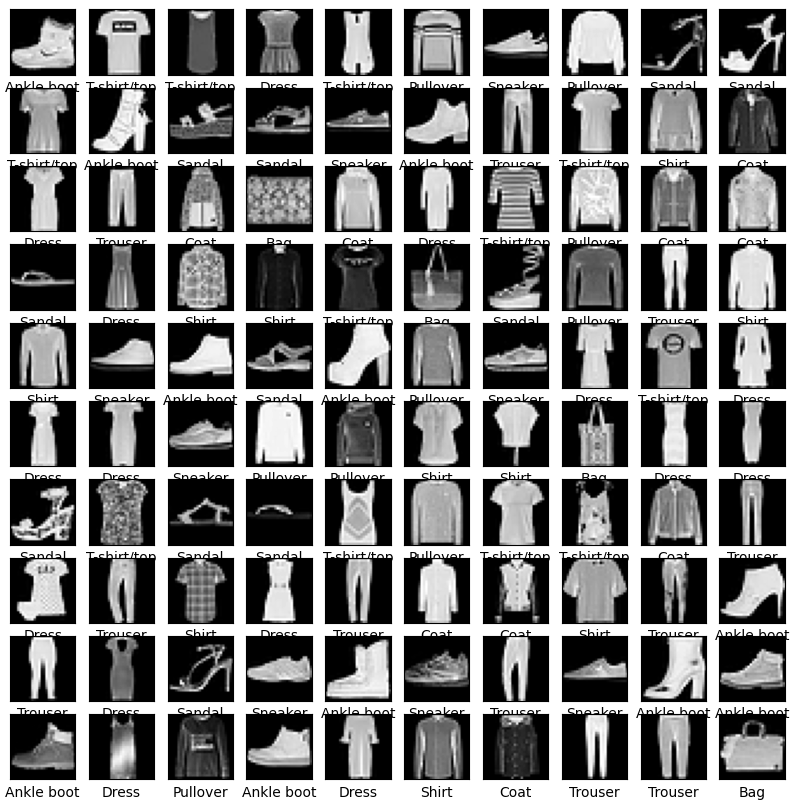

In [4]:
plt.figure(figsize=(10, 10))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.xticks([])  # No ticks on x-axis
    plt.yticks([])  # No ticks on y-axis
    plt.grid(False)  # No grid
    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')  # Display as grayscale
    plt.xlabel(class_names[train_labels[i]])  # Show label
plt.show()

In [5]:
train_images[2]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.08627451],
        [0.4627451 ],
        [0.09411765],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.1882353 ],
        [0.34509805],
        [0.01960784],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.04705882],
        [0.39215687],
        [0.83137256],
        [0.8039216 ],
        [0.7254902 ],
        [0.7019608 ],
        [0.6784314 ],
        [0.7294118 ],
        [0.75686276],
        


<br><br><br><br>


# <font color='SeaGreen'>Convolutional Neural Network</font>        <img src="https://upload.wikimedia.org/wikipedia/commons/6/63/Typical_cnn.png" width=500 height=150>

<br><br>

---
###<font color='SeaGreen'>Step 2. Model </font>

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the output before feeding it into the fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10))  # Output layer with 10 classes

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Summary of the model
model.summary()



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 130,890 (511.29 KB)

 Trainable params: 130,890 (511.29 KB)

 Non-trainable params: 0 (0.00 B)

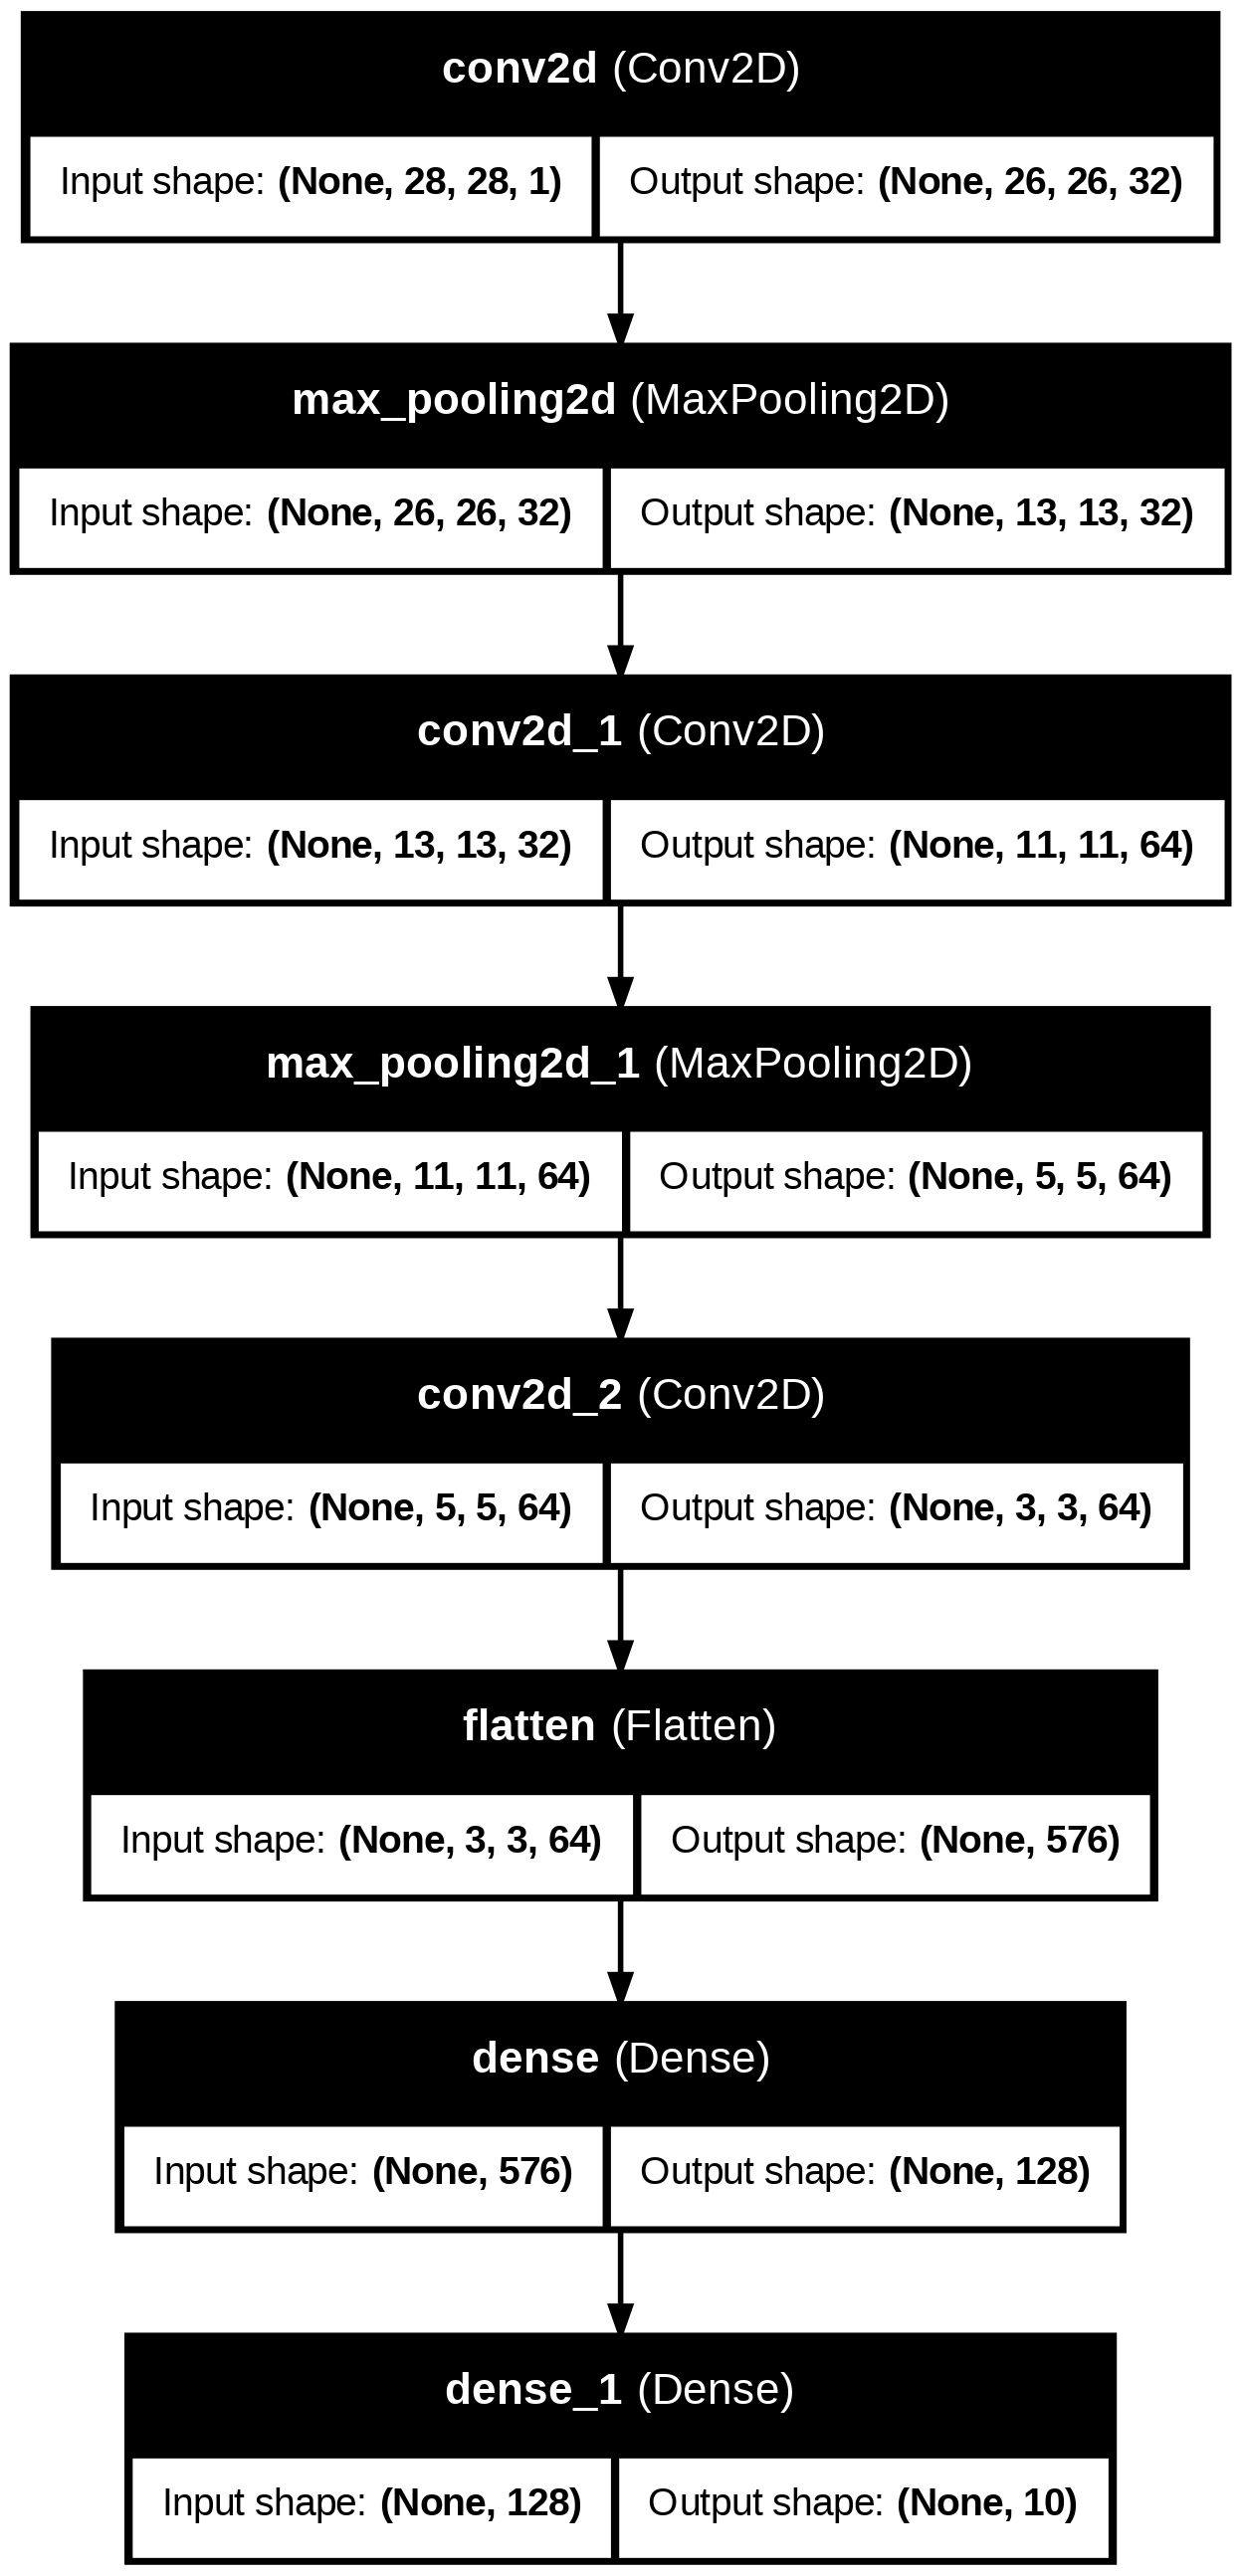

In [7]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

<br><br>

---
###<font color='SeaGreen'>Step 3. Train and evaluate the model</font>

In [8]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7519 - loss: 0.6776 - val_accuracy: 0.8723 - val_loss: 0.3537
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8815 - loss: 0.3251 - val_accuracy: 0.8859 - val_loss: 0.3182
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9001 - loss: 0.2693 - val_accuracy: 0.8963 - val_loss: 0.2923
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9131 - loss: 0.2373 - val_accuracy: 0.8966 - val_loss: 0.2865
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9197 - loss: 0.2136 - val_accuracy: 0.9057 - val_loss: 0.2634
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9288 - loss: 0.1899 - val_accuracy: 0.9086 - val_loss: 0.2598
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9372 - loss: 0.1687 - val_accuracy: 0.9052 - val_loss: 0.2667
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9440 - loss: 0.1502 

####<font color='SeaGreen'>Evaluate the model</font>

313/313 - 0s - 1ms/step - accuracy: 0.9088 - loss: 0.2974
0.9088000059127808


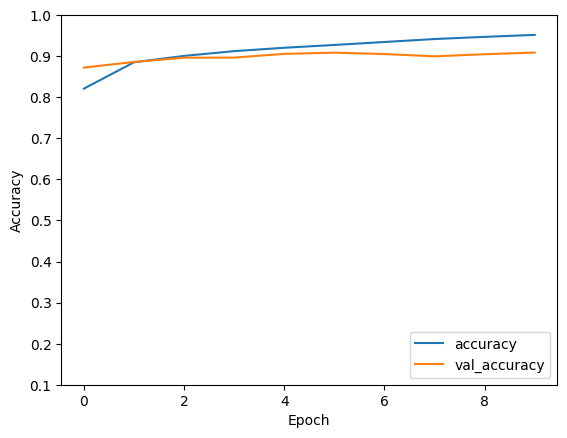

In [9]:
#@title Behold, the rise of Convolutional Neural Networks! By harnessing the power of convolutional layers, we achieve a remarkable 70% accuracy.

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)


<br><br>

---
# PART 2








<font color='SeaGreen'>Visualizing Filters and Feature Maps</font> <img src="https://upload.wikimedia.org/wikipedia/commons/1/19/2D_Convolution_Animation.gif" width=200 height=200>


The simplest way to visualize learned filters in a neural network is to plot them as two-dimensional images. These filters, essentially weights, have a spatial relationship due to their two-dimensional structure. To view these filters, you can access the model's layers and identify convolutional layers with 'conv' in their names. Each convolutional layer has filter weights and bias values, which you can retrieve and examine. Typically, convolutional layers use 3x3 filters, and it's essential that the filter depth matches the input's channel depth. This process helps you understand the model's filter shapes and their compatibility with input channels.


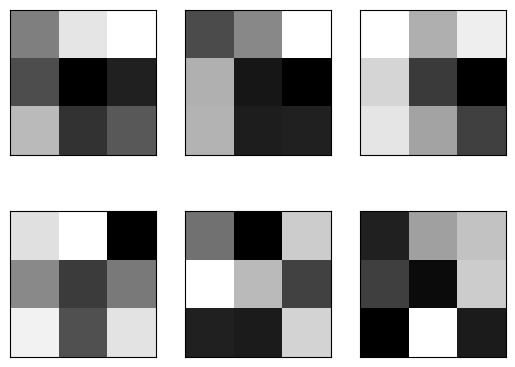

In [ ]:
#@title These are the building blocks of our neural networks.

filters, biases = model.layers[0].get_weights()

ix = 1
for filter_i in range(2):
	filter_tmp = filters[:, :, :, filter_i]
	for channel_j in range(3):  # plot each channel separately
		ax = plt.subplot(2, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		plt.imshow(filter_tmp[:, :, channel_j], cmap='gray')
		ix += 1
plt.show()

In [ ]:
#@title 📤 Let's delve into filter outputs.

model_layers_0 = tf.keras.Model(inputs=model.inputs, outputs=model.layers[0].output)  # redefine model to output right after the first hidden layer

In [ ]:

img = train_images[1]  # load the image
img = np.expand_dims(img, axis=0)  # expand dimensions so that it represents a single 'sample'


feature_maps = model_layers_0.predict(img)  # get feature map for first hidden layer

#plt.figure(figsize=(5, 5));plt.imshow(train_images[1]);plt.axis('off');plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


In [ ]:
transposed_img = np.transpose(train_images[1] , (2, 0, 1))
np.set_printoptions(threshold=np.inf)
for row in transposed_img[0]:
    formatted_row = ["{:0.2f}".format(element) for element in row]
    print(" ".join(formatted_row))

0.60 0.49 0.41 0.40 0.49 0.61 0.67 0.71 0.56 0.44 0.42 0.43 0.48 0.50 0.71 0.85 0.82 0.65 0.64 0.62 0.45 0.40 0.37 0.35 0.28 0.24 0.22 0.30 0.37 0.36 0.34 0.31
0.55 0.57 0.49 0.49 0.59 0.60 0.68 0.70 0.53 0.43 0.52 0.64 0.75 0.85 0.94 0.96 0.95 0.93 0.92 0.89 0.56 0.38 0.39 0.37 0.35 0.31 0.25 0.33 0.36 0.38 0.30 0.28
0.55 0.55 0.45 0.58 0.54 0.52 0.67 0.70 0.67 0.75 0.86 0.92 0.90 0.94 0.96 0.96 0.91 0.88 0.92 0.95 0.69 0.40 0.40 0.35 0.40 0.37 0.25 0.33 0.35 0.31 0.27 0.26
0.53 0.54 0.48 0.52 0.59 0.71 0.80 0.82 0.82 0.80 0.70 0.66 0.64 0.49 0.70 0.94 0.91 0.83 0.76 0.79 0.72 0.47 0.36 0.37 0.36 0.30 0.27 0.38 0.35 0.30 0.25 0.28
0.51 0.55 0.53 0.73 0.84 0.79 0.64 0.59 0.54 0.47 0.37 0.42 0.42 0.13 0.51 0.95 0.93 0.92 0.83 0.76 0.52 0.49 0.40 0.38 0.35 0.31 0.35 0.37 0.27 0.28 0.27 0.34
0.53 0.53 0.50 0.60 0.54 0.47 0.36 0.38 0.40 0.38 0.34 0.47 0.38 0.18 0.46 0.80 0.89 0.91 0.93 0.93 0.65 0.49 0.49 0.36 0.35 0.31 0.34 0.38 0.30 0.26 0.32 0.36
0.57 0.49 0.35 0.33 0.34 0.33 0.29 0.31 

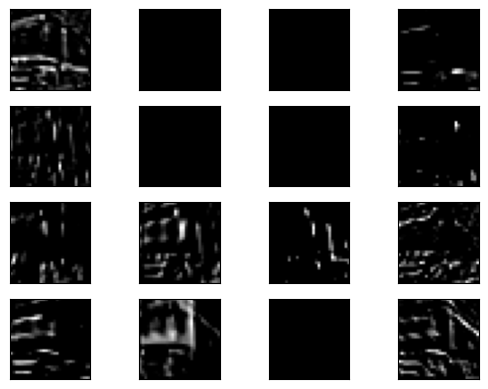

In [ ]:
#@title 📍 feature maps created by the filters from the first layer of our trained CNN. Each filter extracts a unique facet.

ix = 1
for _ in range(4):
  for _ in range(4):
    if ix > 32:
      break
    # specify subplot and turn of axis
    ax = plt.subplot(4, 4, ix)
    ax.set_xticks([])
    ax.set_yticks([])
    # plot filter channel in grayscale
    plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
    ix += 1



In [ ]:
train_images[1].shape

(32, 32, 3)

In [ ]:
filter = filters[:,:,:,2]
filter.shape

(3, 3, 3)

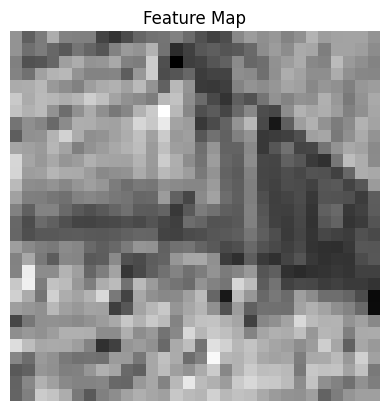

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming train_images[1] is your input image (32x32x3) and filter has shape (3, 3, 3)
input_image = train_images[1]


# Perform convolution
feature_map = np.zeros((input_image.shape[0] - filter.shape[0] + 1, input_image.shape[1] - filter.shape[1] + 1))

for i in range(feature_map.shape[0]):
    for j in range(feature_map.shape[1]):
        feature_map[i, j] = np.sum(input_image[i:i+filter.shape[0], j:j+filter.shape[1], :] * filter)

# Display the feature map
plt.imshow(feature_map, cmap='gray')
plt.title("Feature Map")
plt.axis('off')
plt.show()


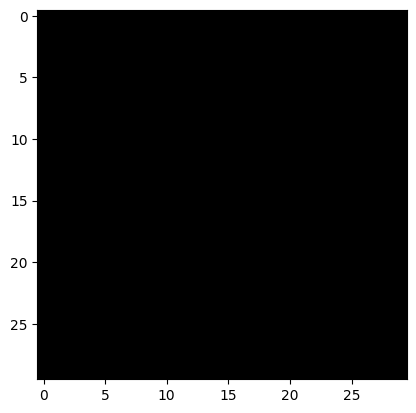

In [ ]:
plt.imshow(feature_maps[0, :, :, 2], cmap='gray')

In [ ]:
bias = biases[2]
bias

-0.17087337

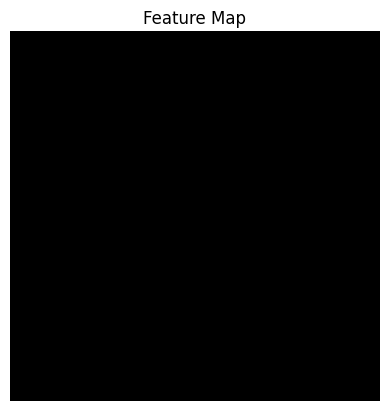

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming train_images[1] is your input image (32x32x3) and filter has shape (3, 3, 3)
input_image = train_images[1]


# Perform convolution
feature_map = np.zeros((input_image.shape[0] - filter.shape[0] + 1, input_image.shape[1] - filter.shape[1] + 1))

for i in range(feature_map.shape[0]):
    for j in range(feature_map.shape[1]):
        feature_map[i, j] = np.sum(input_image[i:i+filter.shape[0], j:j+filter.shape[1], :] * filter) + bias


# Apply ReLU activation
feature_map[feature_map < 0] = 0

# Display the feature map
plt.imshow(feature_map, cmap='gray')
plt.title("Feature Map")
plt.axis('off')
plt.show()


In [ ]:
feature_map_tmp = feature_maps[0, :, :, 2]
print(feature_map_tmp.shape)
print(feature_map_tmp[:6,:6])


(30, 30)
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [ ]:
print(feature_map.shape)
print(feature_map[:6,:6])

(30, 30)
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]




<br><br><br><br><br><br>

---
#<font color='SeaGreen'>Image classification with Multilayer perceptron</font> <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/250px-Colored_neural_network.svg.png" width=150 height=150>






<br><br>

---
###<font color='SeaGreen'>Step 2. Model. Multilayer perceptron</font>

In [ ]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(32, 32,3)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#@title Let's display the architecture of  model:

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │          98,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,418 (427.41 KB)

 Trainable params: 109,418 (427.41 KB)

 Non-trainable params: 0 (0.00 B)



<br><br>

---
###<font color='SeaGreen'>Step 3. Train and evaluate the model</font>

In [ ]:
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.2580 - loss: 1.9993 - val_accuracy: 0.3268 - val_loss: 1.8163
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.3580 - loss: 1.7782 - val_accuracy: 0.3581 - val_loss: 1.8070
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.3686 - loss: 1.7462 - val_accuracy: 0.3786 - val_loss: 1.7206
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.3846 - loss: 1.7053 - val_accuracy: 0.3642 - val_loss: 1.7680
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.3838 - loss: 1.7072 - val_accuracy: 0.3871 - val_loss: 1.7105


####<font color='SeaGreen'>Evaluate the model</font>



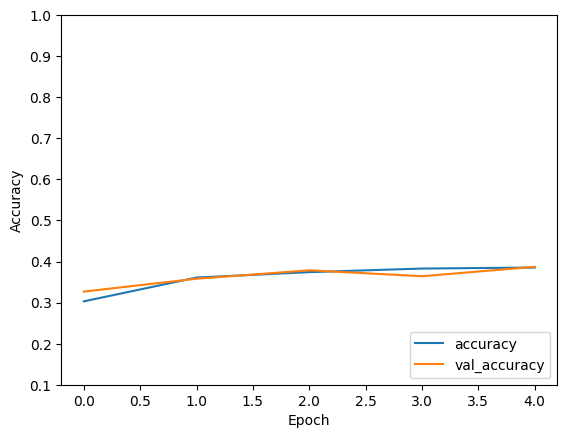

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 1])
plt.legend(loc='lower right')



In [ ]:
#@title We've attempted a simple neural network, but it only achieved 40% accuracy, demonstrating the inefficiency of such basic models"

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.3871 - loss: 1.7105
0.3871000111103058
